In [1]:
!pip install jupyterthemes

In [2]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [6]:
!jt -t grade3

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv("Social_Network_Ads.csv")
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


<AxesSubplot:xlabel='Purchased', ylabel='count'>

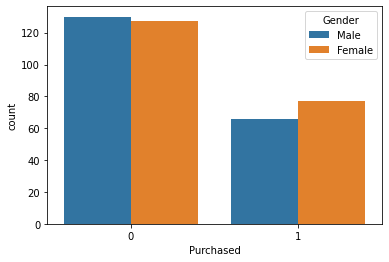

In [24]:
sns.countplot(x='Purchased',hue='Gender',data=df)

<AxesSubplot:>

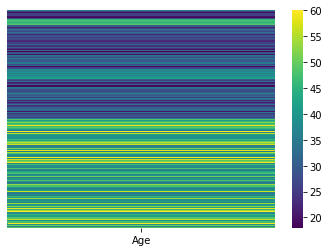

In [25]:
sns.heatmap(df[['Age']],yticklabels=False,cmap='viridis')

In [26]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

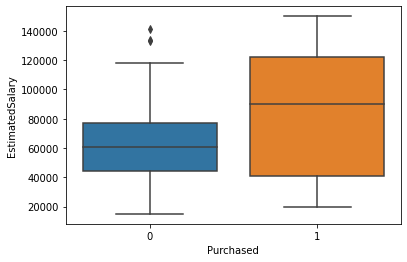

In [27]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=df)

In [28]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

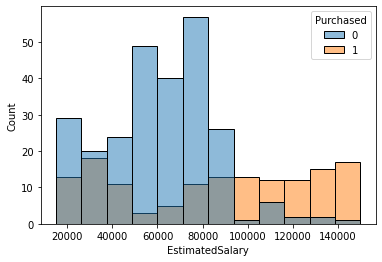

In [36]:
sns.histplot(x='EstimatedSalary',hue='Purchased',data=df)

In [37]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:ylabel='Frequency'>

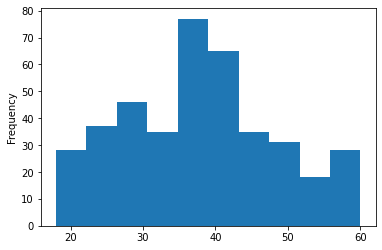

In [45]:
df['Age'].plotot.hist()

In [46]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [53]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [57]:
df['Gender']=df['Gender'].map({'Male':1,'Female':2})

In [58]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0


In [63]:
input=df.drop(['Purchased','User ID'],axis='columns')
target=df['Purchased']

### Logistic Regression

In [66]:
X_train, X_test, y_train, y_test =train_test_split(input,target,test_size=0.2,random_state=1)

In [67]:
X_train.head()

,Gender,Age,EstimatedSalary
93,2,29,28000
23,2,45,22000
299,1,46,117000
13,1,32,18000
90,1,22,81000


In [68]:
y_train.head()

93     0
23     1
299    1
13     0
90     0
Name: Purchased, dtype: int64

In [69]:
model.fit(X_train,y_train)

LogisticRegression()

In [72]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [74]:
accuracy_score(y_test,y_pred)

0.6

In [77]:
confusion_matrix(y_test,y_pred)

array([[48,  0],
       [32,  0]], dtype=int64)

In [78]:
classification_report(y_test,y_pred)

c:\users\paramveer\.virtualenvs\pmds-89yakrni\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\paramveer\.virtualenvs\pmds-89yakrni\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\paramveer\.virtualenvs\pmds-89yakrni\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

'              precision    recall  f1-score   support\n\n           0       0.60      1.00      0.75        48\n           1       0.00      0.00      0.00        32\n\n    accuracy                           0.60        80\n   macro avg       0.30      0.50      0.37        80\nweighted avg       0.36      0.60      0.45        80\n'

In [79]:
print('Coefficient: \n',model.coef_)

Coefficient: 
 [[-3.44655412e-10 -3.02095757e-09 -3.03373451e-06]]


### Decision Tree

In [84]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [85]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [88]:
accuracy_score(y_test,y_pred)

0.775

In [90]:
model.score(X_test,y_test)

0.775

### Support Vector MAchine

In [93]:
from sklearn import svm
model=svm.SVC()

In [97]:
model.fit(X_train,y_train)

SVC()

In [100]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [101]:
model.score(X_test,y_test)

0.7

In [102]:
accuracy_score(y_test,y_pred)

0.7

In [103]:
confusion_matrix(y_test,y_pred)

array([[42,  6],
       [18, 14]], dtype=int64)

In [104]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.70      0.88      0.78        48\n           1       0.70      0.44      0.54        32\n\n    accuracy                           0.70        80\n   macro avg       0.70      0.66      0.66        80\nweighted avg       0.70      0.70      0.68        80\n'

### Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [108]:
model.fit(X_train,y_train)

GaussianNB()

In [109]:
model.score(X_test,y_test)

0.8625

In [111]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [112]:
accuracy_score(y_test,y_pred)

0.8625

### KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [114]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [116]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [117]:
accuracy_score(y_test,y_pred)

0.75

In [118]:
confusion_matrix(y_test,y_pred)

array([[39,  9],
       [11, 21]], dtype=int64)

In [119]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.81      0.80        48\n           1       0.70      0.66      0.68        32\n\n    accuracy                           0.75        80\n   macro avg       0.74      0.73      0.74        80\nweighted avg       0.75      0.75      0.75        80\n'